In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, '/Users/tareen/Desktop/Research_Projects/2020_mavenn_github/mavenn_local')

import mavenn
import logomaker
import seaborn as sns
import re

%matplotlib inline

In [2]:
# Load example data
data_df = mavenn.load_example_dataset('sortseq_full-wt')

# Separate test from data_df
ix_test = data_df['set']=='test'
test_df = data_df[ix_test].reset_index(drop=True)
print(f'test N: {len(test_df):,}')

# Remove test data from data_df
data_df = data_df[~ix_test].reset_index(drop=True)
print(f'training + validation N: {len(data_df):,}')
data_df.head()

test N: 10,269
training + validation N: 40,249


,set,ct_0,ct_1,ct_2,ct_3,ct_4,ct_5,ct_6,ct_7,ct_8,ct_9,x
0,validation,2,0,0,0,0,0,0,0,0,0,AATTGATGTCCGGTAGCTCACTCATTAGGCAGCCAAGGTTTTAGAC...
1,training,0,0,0,1,0,0,0,0,0,0,AATTCATGTGAGTTATGTCTCTCATTAGGCACCCCAGGCTTGAGAT...
2,training,1,0,0,0,0,0,0,0,0,0,AATTAATGTGAGTTAGCTCACTCATTGGACACCCCAGGCTTTACAC...
3,training,0,1,0,0,0,0,0,0,0,0,ACTTAATAAAAGTCAGCTCACTCATTAATCACCCCACGCTCTACAT...
4,training,0,0,0,0,0,3,0,0,0,0,AATTAATGTGAGTTATCTAACTCATTAGGCACCCCAGGCTTTACAC...


In [3]:
# Comptue sequence length and number of bins
L = len(data_df['x'][0])
y_cols = data_df.columns[1:-1]
Y = len(y_cols)
print(f'L={L}, Y={Y}')

L=75, Y=10


In [4]:
# define custom gp_map parameters dictionary
gpmap_kwargs = {'TF_start':1,
                'TF_end':27,
                'RNAP_start':34,
                'RNAP_end':75,
                'regularizer':0.1}

# Create model
model = mavenn.Model(L=L, 
                     Y=Y,
                     alphabet='dna', 
                     regression_type='MPA', 
                     gpmap_type='thermodynamic',
                     gpmap_kwargs=gpmap_kwargs,)

In [5]:
# Set training data
model.set_data(x=data_df['x'],
               y=data_df[y_cols],
               validation_flags=(data_df['set']=='validation'),
               shuffle=True)

# Fit model to data
model.fit(learning_rate=.0005,
          epochs=1000,
          batch_size=50,
          early_stopping=True,
          early_stopping_patience=25,
          linear_initialization=True)


N = 40,249 observations set as training data.
Using 24.7% for validation.
Data shuffled.
Time to set data: 0.816 sec.
Epoch 1/1000
607/607 [==============================] - 5s 4ms/step - loss: 199.0325 - I_var: 0.0052 - val_loss: 181.6932 - val_I_var: 0.0205
Epoch 2/1000
607/607 [==============================] - 2s 3ms/step - loss: 174.9315 - I_var: 0.0658 - val_loss: 163.6032 - val_I_var: 0.1286
Epoch 3/1000
607/607 [==============================] - 2s 3ms/step - loss: 158.9723 - I_var: 0.2025 - val_loss: 153.1622 - val_I_var: 0.2512
Epoch 4/1000
607/607 [==============================] - 2s 3ms/step - loss: 150.2000 - I_var: 0.2939 - val_loss: 149.1548 - val_I_var: 0.3156
Epoch 5/1000
607/607 [==============================] - 2s 3ms/step - loss: 146.0127 - I_var: 0.3443 - val_loss: 147.3230 - val_I_var: 0.3566
Epoch 6/1000
607/607 [==============================] - 2s 3ms/step - loss: 143.8741 - I_var: 0.3808 - val_loss: 146.1228 - val_I_var: 0.3885
Epoch 7/1000
607/607 [========

Epoch 57/1000
607/607 [==============================] - 1s 2ms/step - loss: 140.1847 - I_var: 0.5042 - val_loss: 141.5056 - val_I_var: 0.5015
Epoch 58/1000
607/607 [==============================] - 1s 2ms/step - loss: 140.7608 - I_var: 0.5028 - val_loss: 141.3240 - val_I_var: 0.5058
Epoch 59/1000
607/607 [==============================] - 1s 2ms/step - loss: 140.6466 - I_var: 0.5050 - val_loss: 141.3739 - val_I_var: 0.5047
Epoch 60/1000
607/607 [==============================] - 1s 2ms/step - loss: 140.1864 - I_var: 0.5046 - val_loss: 141.3411 - val_I_var: 0.5056
Epoch 61/1000
607/607 [==============================] - 1s 2ms/step - loss: 138.7893 - I_var: 0.5031 - val_loss: 141.3781 - val_I_var: 0.5037
Epoch 62/1000
607/607 [==============================] - 1s 2ms/step - loss: 140.1255 - I_var: 0.5050 - val_loss: 141.3916 - val_I_var: 0.5034
Epoch 63/1000
607/607 [==============================] - 1s 2ms/step - loss: 139.8950 - I_var: 0.5048 - val_loss: 141.4920 - val_I_var: 0.5013

607/607 [==============================] - 1s 2ms/step - loss: 139.8905 - I_var: 0.5097 - val_loss: 141.3732 - val_I_var: 0.5059
Epoch 115/1000
607/607 [==============================] - 1s 2ms/step - loss: 139.0650 - I_var: 0.5093 - val_loss: 141.1529 - val_I_var: 0.5107
Epoch 116/1000
607/607 [==============================] - 1s 2ms/step - loss: 139.2132 - I_var: 0.5121 - val_loss: 141.0926 - val_I_var: 0.5125
Epoch 117/1000
607/607 [==============================] - 1s 2ms/step - loss: 140.2405 - I_var: 0.5106 - val_loss: 141.2614 - val_I_var: 0.5091
Epoch 118/1000
607/607 [==============================] - 1s 2ms/step - loss: 139.4961 - I_var: 0.5119 - val_loss: 141.2015 - val_I_var: 0.5102
Epoch 119/1000
607/607 [==============================] - 1s 2ms/step - loss: 138.9381 - I_var: 0.5116 - val_loss: 141.1570 - val_I_var: 0.5113
Epoch 120/1000
607/607 [==============================] - 1s 2ms/step - loss: 139.4853 - I_var: 0.5113 - val_loss: 141.3093 - val_I_var: 0.5084
Epoch 1

Epoch 171/1000
607/607 [==============================] - 1s 2ms/step - loss: 139.5303 - I_var: 0.5233 - val_loss: 141.0955 - val_I_var: 0.5194
Epoch 172/1000
607/607 [==============================] - 1s 2ms/step - loss: 139.1056 - I_var: 0.5233 - val_loss: 141.0264 - val_I_var: 0.5218
Epoch 173/1000
607/607 [==============================] - 1s 2ms/step - loss: 138.9018 - I_var: 0.5234 - val_loss: 141.0432 - val_I_var: 0.5212
Epoch 174/1000
607/607 [==============================] - 1s 2ms/step - loss: 139.1651 - I_var: 0.5230 - val_loss: 140.9785 - val_I_var: 0.5226
Epoch 175/1000
607/607 [==============================] - 1s 2ms/step - loss: 139.8918 - I_var: 0.5217 - val_loss: 140.9199 - val_I_var: 0.5238
Epoch 176/1000
607/607 [==============================] - 1s 2ms/step - loss: 139.6281 - I_var: 0.5233 - val_loss: 140.9235 - val_I_var: 0.5244
Epoch 177/1000
607/607 [==============================] - 1s 2ms/step - loss: 139.2838 - I_var: 0.5240 - val_loss: 140.9191 - val_I_var:

Epoch 228/1000
607/607 [==============================] - 1s 1ms/step - loss: 138.3676 - I_var: 0.5295 - val_loss: 140.8802 - val_I_var: 0.5282
Epoch 229/1000
607/607 [==============================] - 1s 1ms/step - loss: 139.3650 - I_var: 0.5287 - val_loss: 140.8013 - val_I_var: 0.5304
Epoch 230/1000
607/607 [==============================] - 1s 1ms/step - loss: 139.3512 - I_var: 0.5288 - val_loss: 140.8665 - val_I_var: 0.5294
Epoch 231/1000
607/607 [==============================] - 1s 1ms/step - loss: 139.7905 - I_var: 0.5313 - val_loss: 140.9704 - val_I_var: 0.5269
Epoch 232/1000
607/607 [==============================] - 1s 1ms/step - loss: 139.9736 - I_var: 0.5313 - val_loss: 140.8974 - val_I_var: 0.5288
Epoch 233/1000
607/607 [==============================] - 1s 1ms/step - loss: 139.7867 - I_var: 0.5302 - val_loss: 140.7805 - val_I_var: 0.5310
Epoch 234/1000
607/607 [==============================] - 1s 1ms/step - loss: 139.4327 - I_var: 0.5317 - val_loss: 140.8578 - val_I_var:

Epoch 285/1000
607/607 [==============================] - 1s 2ms/step - loss: 137.9814 - I_var: 0.5357 - val_loss: 140.7950 - val_I_var: 0.5332
Epoch 286/1000
607/607 [==============================] - 1s 1ms/step - loss: 139.3692 - I_var: 0.5349 - val_loss: 140.7734 - val_I_var: 0.5336
Epoch 287/1000
607/607 [==============================] - 1s 2ms/step - loss: 138.4844 - I_var: 0.5360 - val_loss: 140.7912 - val_I_var: 0.5335
Epoch 288/1000
607/607 [==============================] - 1s 2ms/step - loss: 139.5945 - I_var: 0.5363 - val_loss: 140.9061 - val_I_var: 0.5320
Epoch 289/1000
607/607 [==============================] - 1s 2ms/step - loss: 138.5353 - I_var: 0.5338 - val_loss: 140.8307 - val_I_var: 0.5330
Epoch 290/1000
607/607 [==============================] - 1s 2ms/step - loss: 139.5820 - I_var: 0.5344 - val_loss: 140.7073 - val_I_var: 0.5353
Epoch 291/1000
607/607 [==============================] - 1s 2ms/step - loss: 139.6595 - I_var: 0.5359 - val_loss: 140.6815 - val_I_var:

Epoch 342/1000
607/607 [==============================] - 1s 1ms/step - loss: 139.7229 - I_var: 0.5404 - val_loss: 140.6671 - val_I_var: 0.5385
Epoch 343/1000
607/607 [==============================] - 1s 1ms/step - loss: 139.0558 - I_var: 0.5385 - val_loss: 140.6416 - val_I_var: 0.5387
Epoch 344/1000
607/607 [==============================] - 1s 2ms/step - loss: 139.1506 - I_var: 0.5382 - val_loss: 140.7500 - val_I_var: 0.5368
Epoch 345/1000
607/607 [==============================] - 1s 2ms/step - loss: 138.6036 - I_var: 0.5399 - val_loss: 140.6194 - val_I_var: 0.5395
Epoch 346/1000
607/607 [==============================] - 1s 2ms/step - loss: 139.3037 - I_var: 0.5389 - val_loss: 140.8534 - val_I_var: 0.5346
Epoch 347/1000
607/607 [==============================] - 1s 2ms/step - loss: 138.8897 - I_var: 0.5392 - val_loss: 140.6186 - val_I_var: 0.5398
Epoch 348/1000
607/607 [==============================] - 1s 1ms/step - loss: 139.1889 - I_var: 0.5395 - val_loss: 140.6836 - val_I_var:

Epoch 399/1000
607/607 [==============================] - 2s 3ms/step - loss: 139.2683 - I_var: 0.5401 - val_loss: 140.6994 - val_I_var: 0.5399
Epoch 400/1000
607/607 [==============================] - 2s 3ms/step - loss: 138.9193 - I_var: 0.5427 - val_loss: 140.6458 - val_I_var: 0.5407
Epoch 401/1000
607/607 [==============================] - 2s 3ms/step - loss: 139.0060 - I_var: 0.5424 - val_loss: 140.6121 - val_I_var: 0.5419
Epoch 402/1000
607/607 [==============================] - 1s 2ms/step - loss: 139.1052 - I_var: 0.5436 - val_loss: 140.5793 - val_I_var: 0.5431
Epoch 403/1000
607/607 [==============================] - 1s 2ms/step - loss: 138.9759 - I_var: 0.5420 - val_loss: 140.6198 - val_I_var: 0.5423
Epoch 404/1000
607/607 [==============================] - 1s 2ms/step - loss: 138.9367 - I_var: 0.5427 - val_loss: 140.6727 - val_I_var: 0.5411
Epoch 405/1000
607/607 [==============================] - 1s 2ms/step - loss: 139.6179 - I_var: 0.5441 - val_loss: 140.6157 - val_I_var:

On test data:
I_var_test: 0.534 +- 0.008 bits
I_pred_test: 0.678 +- 0.011 bits


Text(0.5, 1.0, 'training hisotry')

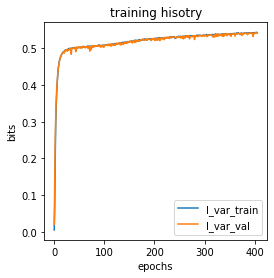

In [6]:
# Show training history
print('On test data:')
x_test = test_df['x'].values
y_test = test_df[y_cols].values

# Compute likelihood information
I_var, dI_var =  model.I_variational(x=x_test, y=y_test)
print(f'I_var_test: {I_var:.3f} +- {dI_var:.3f} bits') 

# Compute predictive information
I_pred, dI_pred = model.I_predictive(x=x_test, y=y_test)
print(f'I_pred_test: {I_pred:.3f} +- {dI_pred:.3f} bits')

I_var_hist = model.history['I_var']
val_I_var_hist = model.history['val_I_var']

fig, ax = plt.subplots(1,1,figsize=[4,4])
ax.plot(I_var_hist, label='I_var_train')
ax.plot(val_I_var_hist, label='I_var_val')
#ax.axhline(I_var, color='C2', linestyle=':', label='I_var_test')
#ax.axhline(I_pred, color='C3', linestyle=':', label='I_pred_test')
ax.legend()
ax.set_xlabel('epochs')
ax.set_ylabel('bits')
ax.set_title('training hisotry')
#ax.set_ylim([0, I_pred*1.2]);

In [7]:
interaction_term = model.get_nn().layers[2].get_weights()[4]
crp_weights = model.get_nn().layers[2].get_weights()[2][0]
rnap_weights = model.get_nn().layers[2].get_weights()[3][0]
print(f'interaction term = {interaction_term[0]:.3f} k_cal/mol')

interaction term = 3.065 k_cal/mol


In [8]:
model.get_nn().layers[2].get_weights()[5]

array([3.4827702], dtype=float32)

In [9]:
crp_df = pd.DataFrame(crp_weights,columns=model.alphabet)
rnap_df = pd.DataFrame(rnap_weights,columns=model.alphabet)

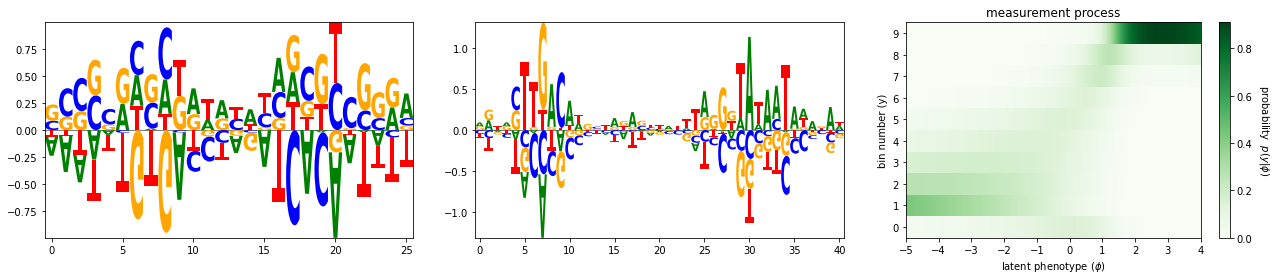

In [10]:
# # Get G-P map parameters in matrix form
# theta = model.get_theta(gauge='uniform')

# Create grid in phi space
phi_lim = [-5, 4]
phi_grid = np.linspace(phi_lim[0], phi_lim[1], 1000)

# Create array of allowable y values
Y = model.model.Y    # Y = number of bins
y_lim = [-.5, Y-.5]
y_all = range(Y)

# Compute matrix of p(y|phi) values
measurement_process = model.p_of_y_given_phi(y_all, phi_grid)

# # Create figure with two panels
fig, axs = plt.subplots(1,3,figsize=[18,4])

logomaker.Logo(crp_df,ax=axs[0],center_values=True)
logomaker.Logo(rnap_df,ax=axs[1],center_values=True)

# # Right panel: draw measurement process as heatmap
ax = axs[2]
im = ax.imshow(measurement_process,
               cmap='Greens',
               extent=phi_lim+y_lim,
               vmin=0,
               origin='lower',
               interpolation='nearest',
               aspect="auto")
ax.set_yticks(y_all)
ax.set_ylabel('bin number (y)')
ax.set_xlabel('latent phenotype ($\phi$)')
ax.set_title('measurement process')
cb = plt.colorbar(im)
cb.set_label('probability  $p(y|\phi)$', rotation=-90, va="bottom")

# Fix up plot
fig.tight_layout(w_pad=3)
fig.savefig('thermodynmic_custom_gpmap_mpa_visualization_sort_seq.png',bbox_index='tight',dpi=300)
# plt.show()